In [1]:
import pandas as pd

# دانلود و خواندن دیتاست
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/imdb_1000.csv"
movies = pd.read_csv(url)

# نمایش ۵ ردیف اول
movies.head()


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [2]:
#تعداد فیلم ها
len(movies)

979

In [3]:
#ستون و نوع داده ها
movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [4]:
#خلاصه آماری اعداد
movies.describe()


,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


In [5]:
#دیدن ستون های خالی یا داده های ناقص
movies.isnull().sum()
#تعداد مقادیر خالی هر ستون

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

In [6]:
# حذف ردیف‌هایی که ستون 'star_rating' خالی دارد
movies = movies.dropna(subset=['star_rating'])


In [7]:
#میانگین امتیاز فیلم ها
mean_rating = movies['star_rating'].mean()
print("میانگین امتیاز فیلم‌ها:", mean_rating)


میانگین امتیاز فیلم‌ها: 7.889785495403474


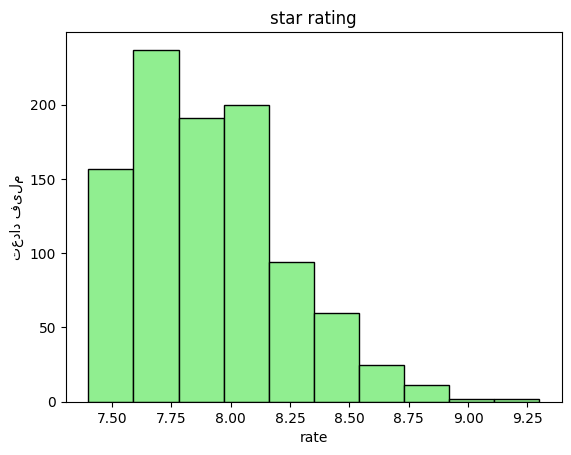

In [12]:
#نمودار توزیع امتیاز ها
import matplotlib.pyplot as plt

plt.hist(movies['star_rating'], bins=10, color='lightgreen', edgecolor='black')
plt.title("star rating")
plt.xlabel("rate")
plt.ylabel("تعداد فیلم")
plt.show()


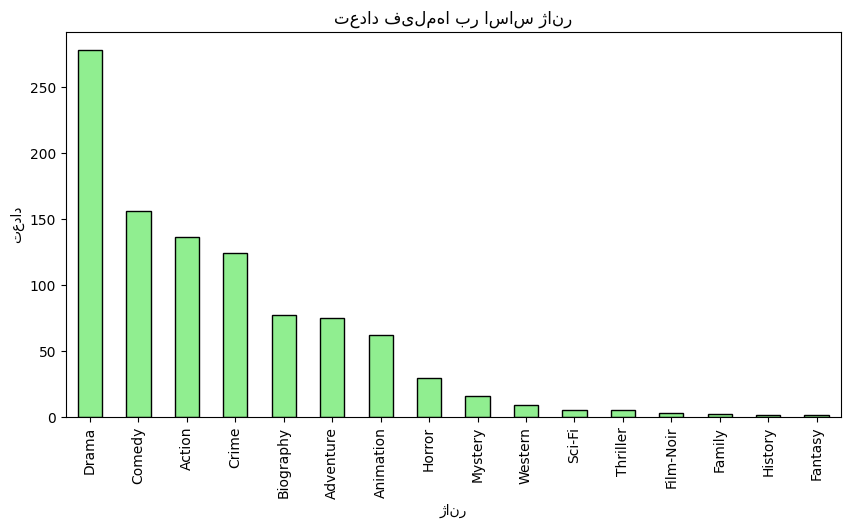

In [13]:
#نمودار تعداد فیلم ها بر اساس ژانر
movies['genre'].value_counts().plot(kind='bar', color='lightgreen', figsize=(10,5) , edgecolor='black')
plt.title("تعداد فیلم‌ها بر اساس ژانر")
plt.xlabel("ژانر")
plt.ylabel("تعداد")
plt.show()


In [15]:
# گروه‌بندی بر اساس ژانر و محاسبه میانگین امتیاز
genre_rating = movies.groupby('genre')['star_rating'].mean().sort_values(ascending=False)

# نمایش
print(genre_rating)


genre
Western      8.255556
Film-Noir    8.033333
History      8.000000
Mystery      7.975000
Adventure    7.933333
Sci-Fi       7.920000
Crime        7.916935
Animation    7.914516
Drama        7.902518
Action       7.884559
Biography    7.862338
Family       7.850000
Comedy       7.822436
Horror       7.806897
Fantasy      7.700000
Thriller     7.680000
Name: star_rating, dtype: float64


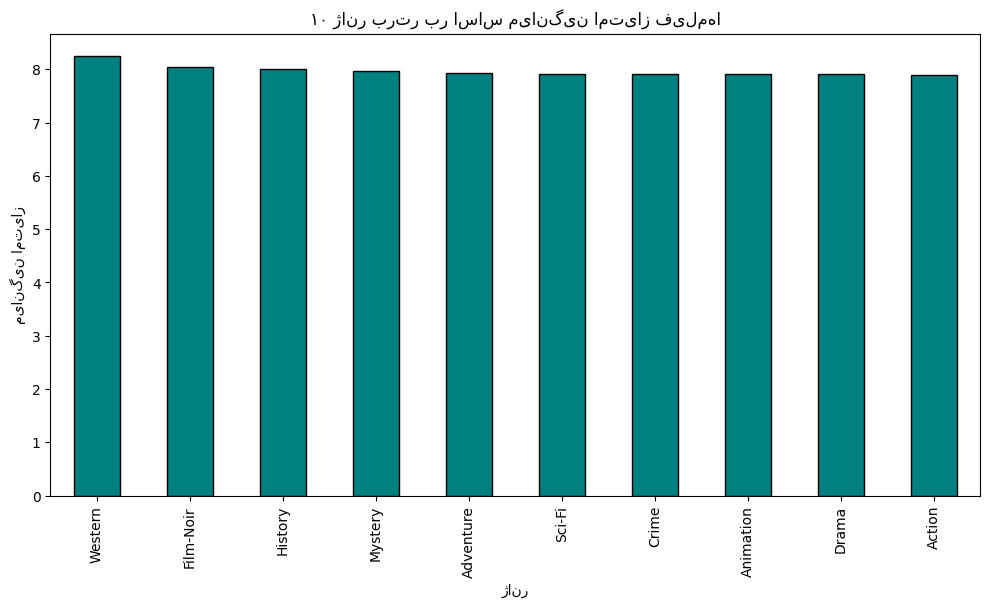

In [17]:
#نمودار 10 ژانر برتر
top_genres = genre_rating.head(10)
top_genres.plot(kind='bar', figsize=(12,6), color='teal', edgecolor='black')
plt.title("۱۰ ژانر برتر بر اساس میانگین امتیاز فیلم‌ها")
plt.xlabel("ژانر")
plt.ylabel("میانگین امتیاز")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_9552\3622498122.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (top_genres_stats['movie_count'][i], top_genres_stats['star_rating'][i]), rotation=30)


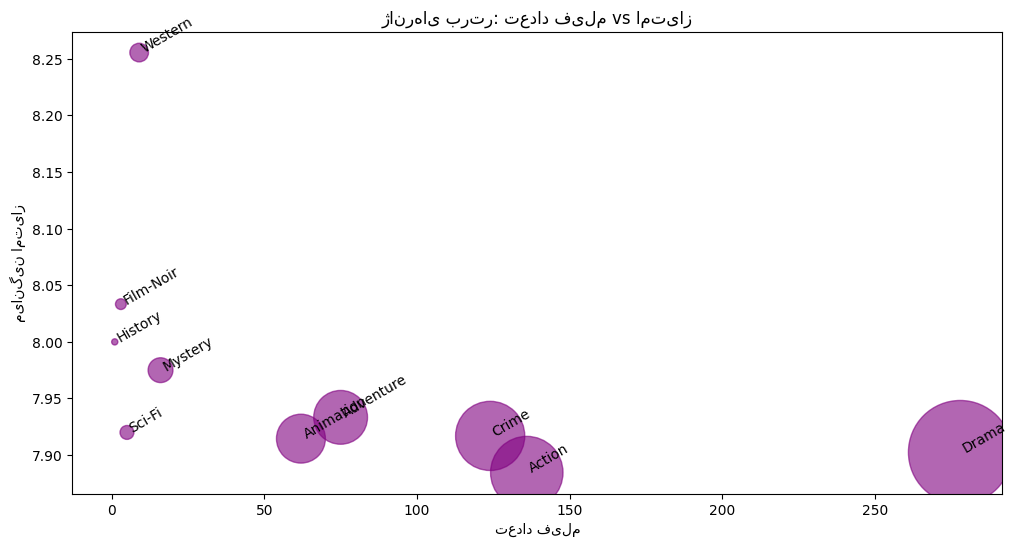

In [18]:
#نمودار Bubble تعداد فیلم vs امتیاز ژانر
genre_stats = movies.groupby('genre').agg({'star_rating':'mean','title':'count'}).rename(columns={'title':'movie_count'})
top_genres_stats = genre_stats.sort_values('star_rating', ascending=False).head(10)

plt.figure(figsize=(12,6))
plt.scatter(top_genres_stats['movie_count'], top_genres_stats['star_rating'], s=top_genres_stats['movie_count']*20, alpha=0.6, color='purple')
for i, txt in enumerate(top_genres_stats.index):
    plt.annotate(txt, (top_genres_stats['movie_count'][i], top_genres_stats['star_rating'][i]), rotation=30)
plt.xlabel("تعداد فیلم")
plt.ylabel("میانگین امتیاز")
plt.title("ژانرهای برتر: تعداد فیلم vs امتیاز")
plt.show()
